In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from matplotlib import style
style.use("fivethirtyeight")

/Users/pagidoju/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/pagidoju/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/pagidoju/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/pagidoju/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
api_key = open('ApiKey_Quandl_New.txt','r').read()

In [3]:
def statelist():
    df_statesList = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return df_statesList[0][1][1:]

In [17]:
statelist()

1     AL
2     AK
3     AZ
4     AR
5     CA
6     CO
7     CT
8     DE
9     FL
10    GA
11    HI
12    ID
13    IL
14    IN
15    IA
16    KS
17    KY
18    LA
19    ME
20    MD
21    MA
22    MI
23    MN
24    MS
25    MO
26    MT
27    NE
28    NV
29    NH
30    NJ
31    NM
32    NY
33    NC
34    ND
35    OH
36    OK
37    OR
38    PA
39    RI
40    SC
41    SD
42    TN
43    TX
44    UT
45    VT
46    VA
47    WA
48    WV
49    WI
50    WY
Name: 1, dtype: object

In [42]:
def retrieve_initialStateData():
    states = statelist()
    main_DataFrame1 = pd.DataFrame()
    
    for abbvn in states:
        queryy = "FMAC/HPI_"+abbvn
        #print(queryy)
        dfM = quandl.get(queryy, authtoken= 'DW-rzcsYoRrqykg8by1u')
        dfM.rename(columns={'Value':str(abbvn)}, inplace= True)
        #dfM_TX = quandl.get("FMAC/HPI_TX", authtoken="DW-rzcsYoRrqykg8by1u")
        #dfM_TX.head()
        
        if main_DataFrame1.empty:
            main_DataFrame1=dfM
            print(main_DataFrame1)
        else:
            main_DataFrame1 = main_DataFrame1.join(dfM)
            #print(main_df2)
    print(main_DataFrame1.head())
    return main_DataFrame1

In [44]:
house_data = retrieve_initialStateData()

                    AL
Date                  
1975-01-31   35.695975
1975-02-28   35.896770
1975-03-31   36.133518
1975-04-30   36.425723
1975-05-31   36.695708
1975-06-30   36.823713
1975-07-31   36.747060
1975-08-31   36.511773
1975-09-30   36.255136
1975-10-31   36.139294
1975-11-30   36.247464
1975-12-31   36.592162
1976-01-31   37.138285
1976-02-29   37.756437
1976-03-31   38.276319
1976-04-30   38.596135
1976-05-31   38.740517
1976-06-30   38.797231
1976-07-31   38.856955
1976-08-31   38.918701
1976-09-30   38.958368
1976-10-31   39.018758
1976-11-30   39.159408
1976-12-31   39.316048
1977-01-31   39.393664
1977-02-28   39.416713
1977-03-31   39.450967
1977-04-30   39.609241
1977-05-31   39.921331
1977-06-30   40.340456
...                ...
2015-07-31  127.854262
2015-08-31  127.845969
2015-09-30  127.319078
2015-10-31  126.705007
2015-11-30  126.273111
2015-12-31  126.028940
2016-01-31  126.252948
2016-02-29  127.029795
2016-03-31  128.128436
2016-04-30  129.498282
2016-05-31 

In [45]:
house_data.to_pickle('HPI.pickle')

In [46]:
housing_data = pd.read_pickle('HPI.pickle')

In [47]:
housing_data = housing_data.pct_change()
print(housing_data.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-01-31       NaN       NaN       NaN       NaN       NaN       NaN   
1975-02-28  0.005625  0.014812  0.018176  0.009802  0.003364  0.011894   
1975-03-31  0.006595  0.014944  0.016828  0.008556  0.012028  0.011914   
1975-04-30  0.008087  0.015324  0.012872  0.006987  0.019455  0.011377   
1975-05-31  0.007412  0.016430  0.006634  0.006457  0.015819  0.009517   

                  CT        DE        FL        GA    ...           SD  \
Date                                                  ...                
1975-01-31       NaN       NaN       NaN       NaN    ...          NaN   
1975-02-28  0.022102 -0.000517  0.039746 -0.008799    ...    -0.010672   
1975-03-31  0.016281  0.000651  0.055802 -0.003689    ...    -0.011007   
1975-04-30  0.008991  0.003454  0.064376  0.002078    ...    -0.011125   
1975-05-31  0.002855  0.007281  0.006

In [48]:
housing_data.dropna(inplace=True)

In [49]:
print(housing_data.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-02-28  0.005625  0.014812  0.018176  0.009802  0.003364  0.011894   
1975-03-31  0.006595  0.014944  0.016828  0.008556  0.012028  0.011914   
1975-04-30  0.008087  0.015324  0.012872  0.006987  0.019455  0.011377   
1975-05-31  0.007412  0.016430  0.006634  0.006457  0.015819  0.009517   
1975-06-30  0.003488  0.017258 -0.001631  0.006290  0.006882  0.007930   

                  CT        DE        FL        GA    ...           SD  \
Date                                                  ...                
1975-02-28  0.022102 -0.000517  0.039746 -0.008799    ...    -0.010672   
1975-03-31  0.016281  0.000651  0.055802 -0.003689    ...    -0.011007   
1975-04-30  0.008991  0.003454  0.064376  0.002078    ...    -0.011125   
1975-05-31  0.002855  0.007281  0.006068  0.003620    ...    -0.010327   
1975-06-30 -0.000794  0.009270 -0.045

In [50]:
import numpy as np
housing_data.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_data.dropna(inplace=True)

In [52]:
print(housing_data.head())

                  AL        AK        AZ        AR        CA        CO  \
Date                                                                     
1975-02-28  0.005625  0.014812  0.018176  0.009802  0.003364  0.011894   
1975-03-31  0.006595  0.014944  0.016828  0.008556  0.012028  0.011914   
1975-04-30  0.008087  0.015324  0.012872  0.006987  0.019455  0.011377   
1975-05-31  0.007412  0.016430  0.006634  0.006457  0.015819  0.009517   
1975-06-30  0.003488  0.017258 -0.001631  0.006290  0.006882  0.007930   

                  CT        DE        FL        GA    ...           SD  \
Date                                                  ...                
1975-02-28  0.022102 -0.000517  0.039746 -0.008799    ...    -0.010672   
1975-03-31  0.016281  0.000651  0.055802 -0.003689    ...    -0.011007   
1975-04-30  0.008991  0.003454  0.064376  0.002078    ...    -0.011125   
1975-05-31  0.002855  0.007281  0.006068  0.003620    ...    -0.010327   
1975-06-30 -0.000794  0.009270 -0.045

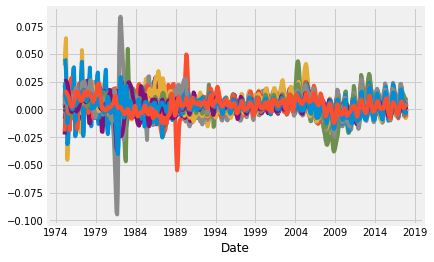

In [53]:
housing_data.plot()
plt.legend().remove()
plt.show()